  # Predicting the mood of the person based on the song he /she is listening to
  
  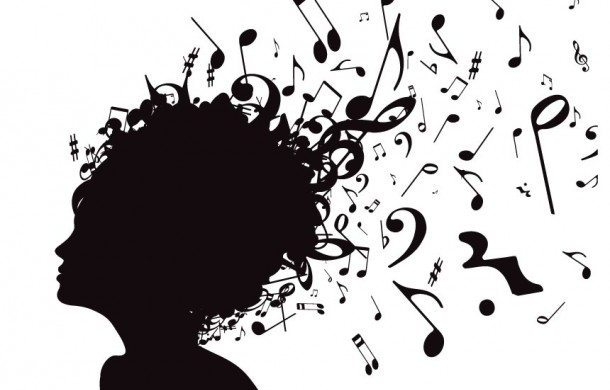
        The model will try to cluster the songs based on their features into    different groups .Then based on the song the person is listening to the model will try to classify the emotion group that song belonged to.In this way the model would be able to know the mood of the listener.





# New Section

## Importing the necessary libraries

In [16]:
## For storing the data into dataframes and all
import pandas as pd
## For numerical computations
import numpy as np
## For visualising purpose
import matplotlib.pyplot as plt
# To make this notebook's output stable across runs
np.random.seed(42)
## For visualisation purpose
import seaborn as sns
import warnings


## Importing the dataset

In [17]:
songs = pd.read_csv("/content/data.csv")

songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
songs.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


## Exploratory Data Analysis

In [20]:
# examining the correlation between different features

corr_metrics=songs.corr()
corr_metrics.style.background_gradient()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
Unnamed: 0,1.000000,0.133055,-0.139615,-0.104185,-0.039880,-0.104641,-0.035611,-0.039962,0.021935,0.060639,-0.135362,-0.027890,-0.053235,-0.077812,-0.865969
acousticness,0.133055,1.000000,-0.179894,0.071536,-0.646319,0.144397,-0.081037,-0.117126,-0.562021,0.068028,-0.099893,-0.127596,-0.190353,-0.152227,-0.129627
danceability,-0.139615,-0.179894,1.000000,0.004695,0.038557,-0.130561,0.022325,-0.132044,0.104362,-0.047867,0.142661,-0.143538,0.128909,0.442061,0.176706
duration_ms,-0.104185,0.071536,0.004695,1.000000,-0.144473,0.305403,0.023570,0.023203,-0.273798,-0.074806,-0.079562,-0.076469,-0.040157,-0.120030,0.146749
energy,-0.039880,-0.646319,0.038557,-0.144473,1.000000,-0.122890,0.072886,0.217435,0.762177,-0.070263,0.093102,0.165721,0.182895,0.278383,0.039688
instrumentalness,-0.104641,0.144397,-0.130561,0.305403,-0.122890,1.000000,-0.009640,0.001063,-0.354625,-0.030099,-0.155349,0.000347,-0.070721,-0.194630,0.152594
key,-0.035611,-0.081037,0.022325,0.023570,0.072886,-0.009640,1.000000,0.049739,0.050929,-0.195040,0.019116,0.040301,0.024937,0.032485,0.033594
liveness,-0.039962,-0.117126,-0.132044,0.023203,0.217435,0.001063,0.049739,1.000000,0.156648,-0.018587,0.092403,0.010558,0.018199,-0.053011,0.026364
loudness,0.021935,-0.562021,0.104362,-0.273798,0.762177,-0.354625,0.050929,0.156648,1.000000,-0.044015,0.088844,0.156418,0.143011,0.204968,-0.072000
mode,0.060639,0.068028,-0.047867,-0.074806,-0.070263,-0.030099,-0.195040,-0.018587,-0.044015,1.000000,-0.049398,-0.059995,-0.039038,-0.032879,-0.072336


In [21]:
# Removing the unwanted columns 

features=songs.drop(columns=["song_title","artist","Unnamed: 0"])
features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


In [22]:

features.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


# Feature Scaling

In [23]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()


loudness = features[['loudness']].values
key = features[['key']].values
tempo = features[['tempo']].values
time_signature = features[['time_signature']].values
duration_ms = features[['duration_ms']].values


features[['loudness']] = min_max_scaler.fit_transform(loudness)
features[['key']] = min_max_scaler.fit_transform(key)
features[['tempo']]= min_max_scaler.fit_transform(tempo)
features[['time_signature']]= min_max_scaler.fit_transform(time_signature)
features[['duration_ms']] = min_max_scaler.fit_transform(duration_ms)

In [24]:
features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,0.190735,0.434,0.021900,0.181818,0.1650,0.741141,1,0.4310,0.596033,0.75,0.286,1
1,0.1990,0.743,0.314481,0.359,0.006110,0.090909,0.1370,0.692162,1,0.0794,0.654474,0.75,0.588,1
2,0.0344,0.838,0.171624,0.412,0.000234,0.181818,0.1590,0.791369,1,0.2890,0.158539,0.75,0.173,1
3,0.6040,0.494,0.185488,0.338,0.510000,0.454545,0.0922,0.544709,1,0.0261,0.225162,0.75,0.230,1
4,0.1800,0.678,0.381202,0.561,0.512000,0.454545,0.4390,0.654132,0,0.0694,0.735659,0.75,0.904,1


## Performing Feature Reduction

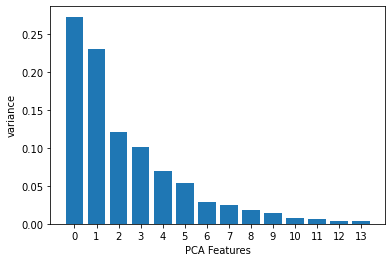

In [25]:
#Feature Reduction as with the help of this graph we can see the features having high variance
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(features)
xfeatures = range(pca.n_components_)
plt.bar(xfeatures,pca.explained_variance_)
plt.xticks(xfeatures)
plt.xlabel('PCA Features')
plt.ylabel('variance')
plt.show()

In [26]:
# So from above we can see five features are having high variance so we can remove the unwanted features
features=features.drop(columns=["duration_ms","energy","instrumentalness","key","mode","tempo","time_signature","valence","target"])
features.head()

,acousticness,danceability,liveness,loudness,speechiness
0,0.0102,0.833,0.1650,0.741141,0.4310
1,0.1990,0.743,0.1370,0.692162,0.0794
2,0.0344,0.838,0.1590,0.791369,0.2890
3,0.6040,0.494,0.0922,0.544709,0.0261
4,0.1800,0.678,0.4390,0.654132,0.0694


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f389b6ecf98>,
      dtype=object)

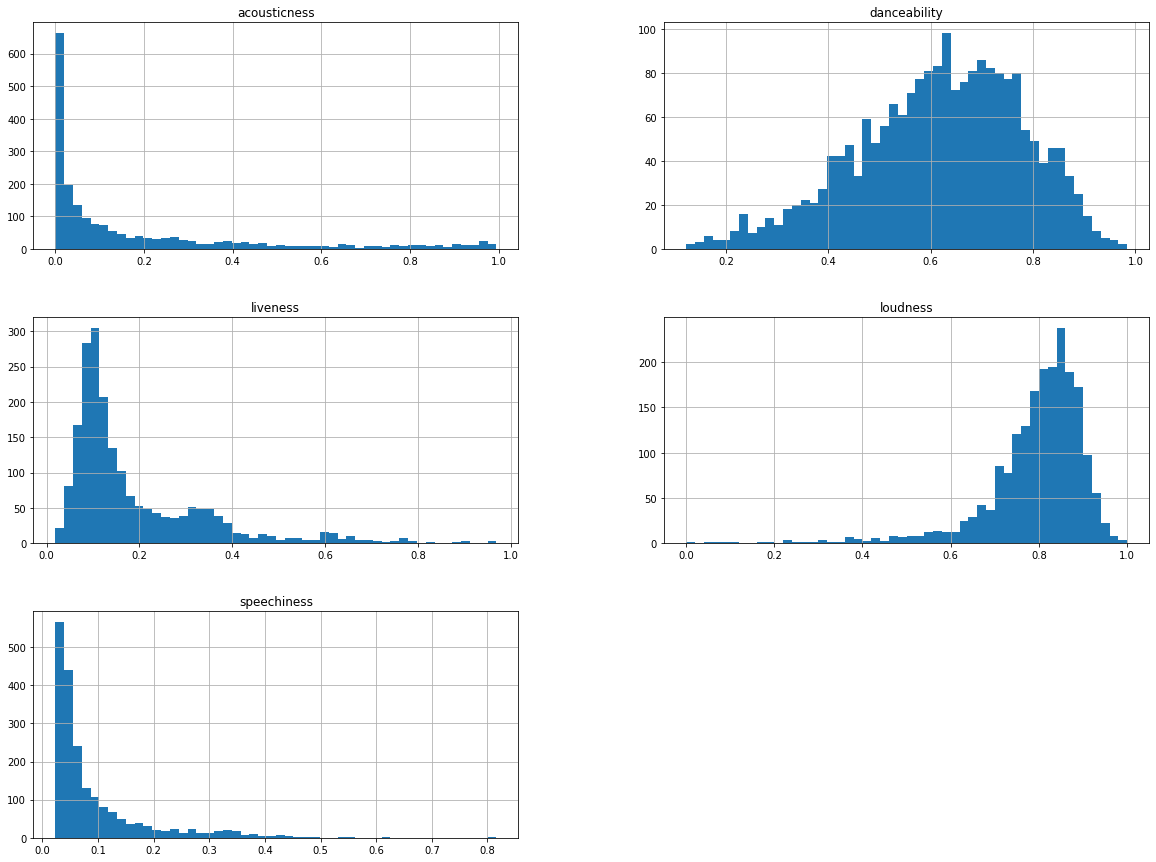

In [27]:
features.hist(bins=50,figsize=(20,15))

# Now we will try to cluster the songs on the basis of emotion of the songs

In [28]:
## For clustering we will be KMeans Clustering for that first we need to know the optimum number of clusters
#import the required model
from sklearn.cluster import KMeans
#Within Cluster Sum Of Square to evaluate the efficiency of a model
wcss = []

## Now we will try predicting values using different number of clusters and store the result in wcss array¶


In [29]:
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k,random_state=42,max_iter=300)
    km = km.fit(features)
    wcss.append(km.inertia_)

In [30]:
##It gives an idea of how well the objects are classified taking that number of clusters
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4824337334937478)
For n_clusters = 3, silhouette score is 0.2883073032342218)
For n_clusters = 4, silhouette score is 0.2625122531736684)
For n_clusters = 5, silhouette score is 0.27004553080113314)
For n_clusters = 6, silhouette score is 0.25917491333990894)
For n_clusters = 7, silhouette score is 0.2558632560333833)
For n_clusters = 8, silhouette score is 0.22147292663813203)
For n_clusters = 9, silhouette score is 0.23218380955483547)
For n_clusters = 10, silhouette score is 0.23305344954220716)
For n_clusters = 11, silhouette score is 0.23232584997403724)
For n_clusters = 12, silhouette score is 0.2289772082574839)
For n_clusters = 13, silhouette score is 0.23276827554823307)
For n_clusters = 14, silhouette score is 0.21248992390081006)


## Plotting the wcss against number of clusters to use elbow method to determine optimal number of clusters

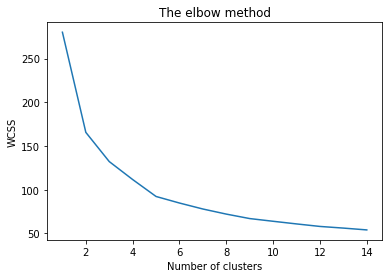

In [31]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(K, wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
# Within cluster sum of squares
plt.ylabel('WCSS')
plt.show()

### So the optimal number of clusters seems to be 4 as elbow method was depicting 5 while silhouette_score was giving a better value with 4

In [32]:
## Standardize the data and fit that standardized data to KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)


In [33]:
## Made a pipeline to perform these tasks together
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler,KMeans(n_clusters=4,init='k-means++',random_state=3222,max_iter=300))
pipeline.fit(features)
labels = pipeline.predict(features)
label_df = pd.DataFrame(labels)
np.shape(label_df)
features[['cluster_labels']] = label_df
features[['song_title']] = songs[['song_title']]
features[['artist']] = songs[['artist']]
features.head(10)

,acousticness,danceability,liveness,loudness,speechiness,cluster_labels,song_title,artist
0,0.01020,0.833,0.1650,0.741141,0.4310,3,Mask Off,Future
1,0.19900,0.743,0.1370,0.692162,0.0794,0,Redbone,Childish Gambino
2,0.03440,0.838,0.1590,0.791369,0.2890,3,Xanny Family,Future
3,0.60400,0.494,0.0922,0.544709,0.0261,1,Master Of None,Beach House
4,0.18000,0.678,0.4390,0.654132,0.0694,2,Parallel Lines,Junior Boys
5,0.00479,0.804,0.1640,0.805581,0.1850,3,Sneakin’,Drake
6,0.01450,0.739,0.2070,0.667673,0.1560,0,Childs Play,Drake
7,0.02020,0.266,0.1600,0.655322,0.0371,0,Gyöngyhajú lány,Omega
8,0.04810,0.603,0.3420,0.898780,0.3470,3,I've Seen Footage,Death Grips
9,0.00208,0.836,0.5710,0.771729,0.2370,2,Digital Animal,Honey Claws
